In [1]:
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from tensorflow.keras import models, layers
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
df = tf.keras.preprocessing.image_dataset_from_directory(
    r"/content/drive/MyDrive/Datasets/PlantDisease",
    seed=42,
    shuffle=True,
    image_size=(256,256)
)

Found 2152 files belonging to 3 classes.


In [3]:
print("Class Labels")
print(df.class_names)

Class Labels
['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']


In [4]:
#first batch.. Images
for image_batch, labels_batch in df.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(32, 256, 256, 3)
[1 2 1 1 2 0 0 1 1 1 1 0 0 1 1 0 0 2 0 0 1 0 0 0 1 0 0 1 0 2 2 0]


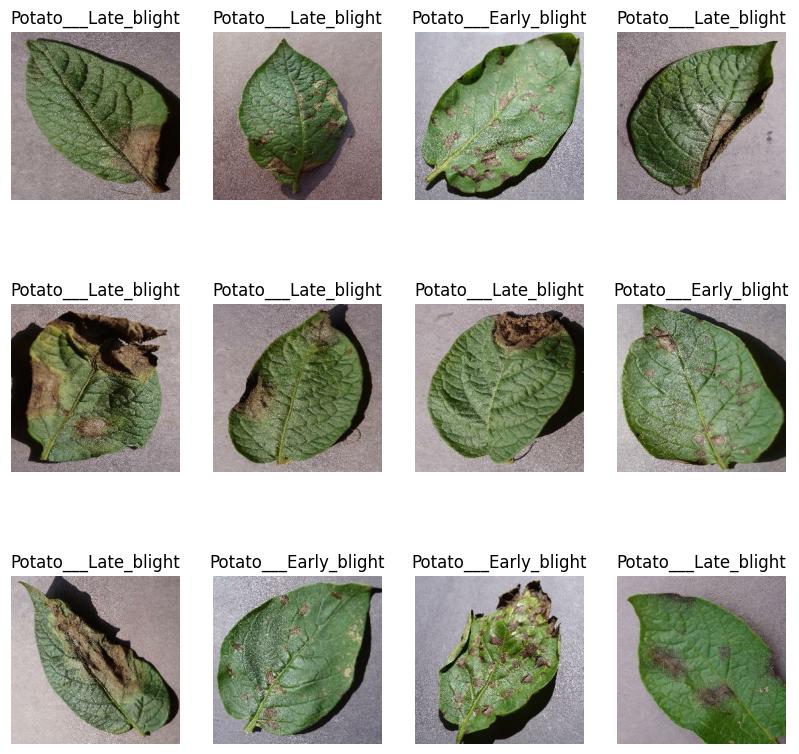

In [5]:
plt.figure(figsize=(10, 10))
class_n=df.class_names
for image_batch, labels_batch in df.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_n[labels_batch[i]])
        plt.axis("off")

In [6]:
images = []
labels = []

# Iterate over the dataset to collect images and labels
for image_batch, label_batch in df:
    # Flatten each image batch and convert to NumPy array
    image_batch_np = np.array([image.numpy().flatten() for image in image_batch])

    # Append flattened image batch to the images list
    images.append(image_batch_np)

    # Append label batch to the labels list
    labels.append(label_batch.numpy())

# Concatenate flattened image batches along the batch dimension
images = np.concatenate(images)

# Convert labels list to NumPy array
labels = np.concatenate(labels)

In [7]:
print('Dataset Length: ',len(images))
print('Label Length: ',len(labels))

Dataset Length:  2152
Label Length:  2152


In [8]:
print(images)

[[175. 164. 168. ... 153. 146. 154.]
 [125. 122. 131. ... 153. 155. 168.]
 [160. 158. 171. ... 157. 155. 166.]
 ...
 [147. 142. 148. ... 173. 169. 184.]
 [111. 103. 100. ... 198. 195. 190.]
 [142. 140. 151. ... 176. 174. 185.]]


In [9]:
print(labels)

[1 0 0 ... 0 0 0]


In [10]:
print("--------------------------------------\n")
print("Train-Test Split")
x_train,x_test,y_train,y_test=train_test_split(images,labels,test_size=0.2,random_state=42)
print("--------------------------------------\n")

--------------------------------------

Train-Test Split
--------------------------------------



In [11]:
x_train.shape

(1721, 196608)

In [12]:
model = models.Sequential([
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(256, 256, 3)),
    layers.Dropout(0.5),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.Dropout(0.5),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.Dropout(0.5),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax'),
])

In [13]:
# Reshape input data to have 4 dimensions: (batch_size, height, width, channels)
x_train = x_train.reshape(-1, 256, 256, 3)
x_test = x_test.reshape(-1, 256, 256, 3)

# Ensure input data type is float32
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize the input data
x_train /= 255.0
x_test /= 255.0

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 dropout (Dropout)           (None, 254, 254, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 dropout_1 (Dropout)         (None, 125, 125, 64)      0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                   

In [15]:
model.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [16]:
# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [17]:
print("--------------------------------------\n")
print("Training Started.\n")

history = model.fit(x_train, y_train, epochs=20, validation_split=0.1,callbacks=[early_stopping])

print("Training Finished.\n")
print("--------------------------------------\n")

--------------------------------------

Training Started.

Epoch 1/20
49/49 [==============================] - 16s 160ms/step - loss: 1.6189 - accuracy: 0.6415 - val_loss: 0.7998 - val_accuracy: 0.8208
Epoch 2/20
49/49 [==============================] - 6s 119ms/step - loss: 0.3308 - accuracy: 0.8766 - val_loss: 0.6070 - val_accuracy: 0.8960
Epoch 3/20
49/49 [==============================] - 6s 118ms/step - loss: 0.2012 - accuracy: 0.9231 - val_loss: 0.4409 - val_accuracy: 0.9191
Epoch 4/20
49/49 [==============================] - 6s 120ms/step - loss: 0.1176 - accuracy: 0.9574 - val_loss: 0.3416 - val_accuracy: 0.8728
Epoch 5/20
49/49 [==============================] - 6s 118ms/step - loss: 0.0987 - accuracy: 0.9625 - val_loss: 0.3148 - val_accuracy: 0.9191
Epoch 6/20
49/49 [==============================] - 6s 119ms/step - loss: 0.0952 - accuracy: 0.9664 - val_loss: 0.3480 - val_accuracy: 0.9306
Epoch 7/20
49/49 [==============================] - 6s 117ms/step - loss: 0.0862 - accur

In [18]:
print("Model Evalutaion Phase.\n")
loss,accuracy=model.evaluate(x_test,y_test)
print(f'Accuracy: {round(accuracy*100,2)}')
print("--------------------------------------\n")
y_pred=model.predict(x_test)
y_pred = (y_pred > 0.5).astype(int)

Model Evalutaion Phase.

14/14 [==============================] - 1s 51ms/step - loss: 0.2624 - accuracy: 0.8979
Accuracy: 89.79
--------------------------------------

14/14 [==============================] - 0s 20ms/step


In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

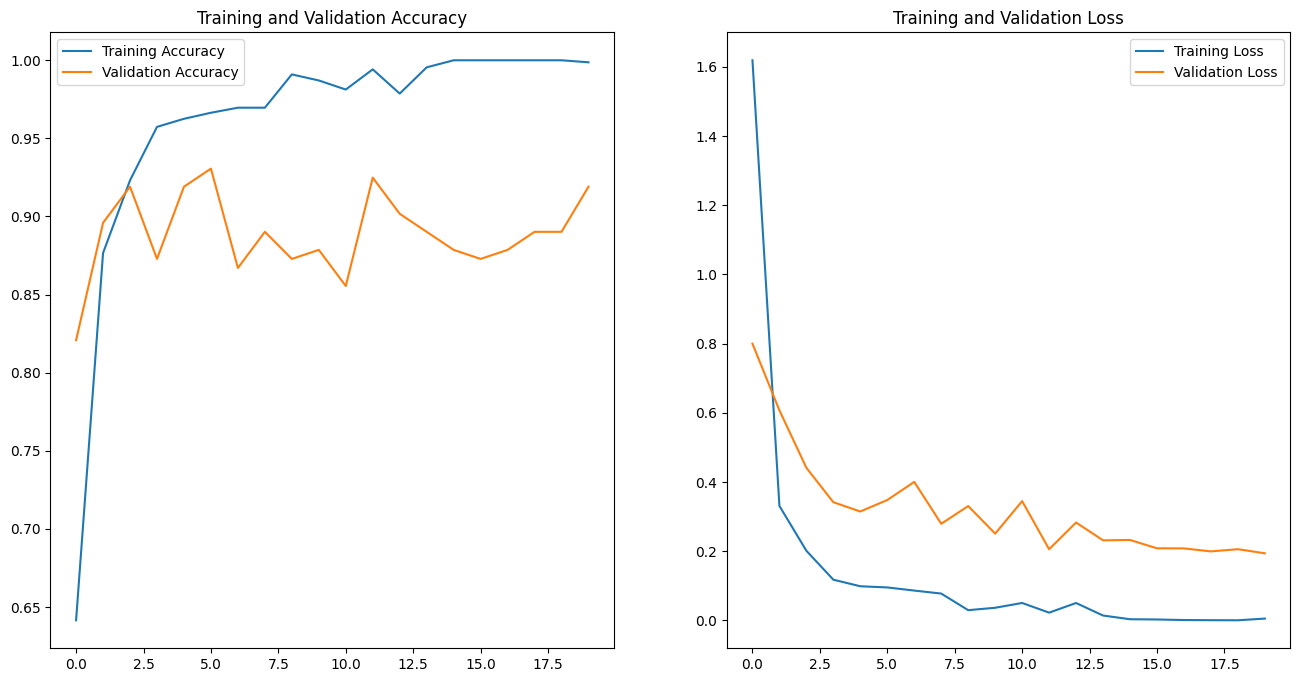

In [20]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(range(20), acc, label='Training Accuracy')
plt.plot(range(20), val_acc, label='Validation Accuracy')
plt.legend(loc='best')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(20), loss, label='Training Loss')
plt.plot(range(20), val_loss, label='Validation Loss')
plt.legend(loc='best')
plt.title('Training and Validation Loss')
plt.show()

In [22]:
model.save("/content/drive/My Drive/potatoes_CNN.h5")